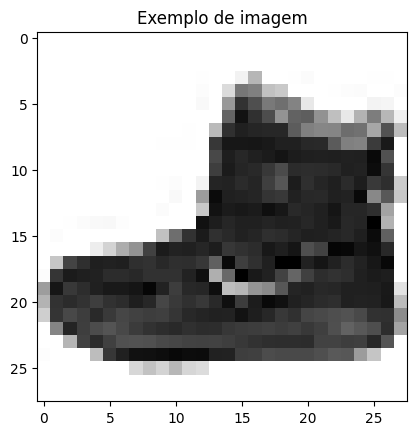

Rótulo binário: 0
Epoch 1/20


2025-08-22 22:49:14.397092: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9531 - loss: 0.1292
Epoch 1: val_loss improved from inf to 0.05767, saving model to model.h5


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9531 - loss: 0.1292 - val_accuracy: 0.9828 - val_loss: 0.0577
Epoch 2/20
1873/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9827 - loss: 0.0502
Epoch 2: val_loss improved from 0.05767 to 0.04422, saving model to model.h5


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 17ms/step - accuracy: 0.9827 - loss: 0.0502 - val_accuracy: 0.9856 - val_loss: 0.0442
Epoch 3/20
1873/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9868 - loss: 0.0393
Epoch 3: val_loss did not improve from 0.04422
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 17ms/step - accuracy: 0.9868 - loss: 0.0393 - val_accuracy: 0.9852 - val_loss: 0.0589
Epoch 4/20
1872/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9878 - loss: 0.0345
Epoch 4: val_loss improved from 0.04422 to 0.04273, saving model to model.h5


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9878 - loss: 0.0345 - val_accuracy: 0.9881 - val_loss: 0.0427
Epoch 5/20
1872/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9907 - loss: 0.0307
Epoch 5: val_loss did not improve from 0.04273
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9907 - loss: 0.0307 - val_accuracy: 0.9882 - val_loss: 0.0443
Epoch 6/20
1874/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9914 - loss: 0.0259
Epoch 6: val_loss did not improve from 0.04273
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9914 - loss: 0.0259 - val_accuracy: 0.9874 - val_loss: 0.0450
Epoch 7/20
1873/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9924 - loss: 0.0236
Epoch 7: val_loss did not improve from 0.04273
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.9924 - loss: 0.0236 - val_accuracy: 0.9865 - val_loss: 0.0507
Epoch 8/20
1872/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9918 - loss: 0.0229
Epoch 8: val_loss d

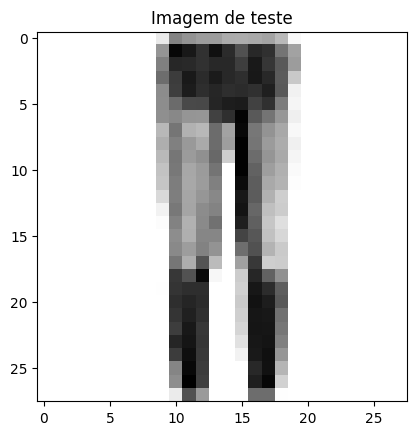

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Predição (0=frio, 1=calor): 1
Rótulo real: 1


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd

from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import RMSprop
from sklearn.metrics import classification_report, confusion_matrix

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_teste_final = x_test[-5:]
y_teste_final = y_test[-5:]

x_test = x_test[:-5]
y_test = y_test[:-5]

def rotulo_binario(y):
    return np.where(np.isin(y, [1, 5, 7, 8]), 1, 0)

y_train_bin = rotulo_binario(y_train)
y_test_bin = rotulo_binario(y_test)

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

y_train_bin = keras.utils.to_categorical(y_train_bin, 2)
y_test_bin = keras.utils.to_categorical(y_test_bin, 2)

plt.imshow(x_train[0].reshape(28, 28), cmap=plt.cm.binary)
plt.title("Exemplo de imagem")
plt.show()
print("Rótulo binário:", np.argmax(y_train_bin[0]))

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='model.h5',
        monitor='val_loss',
        save_best_only=True,
        verbose=1
    ),
    keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        verbose=1
    )
]

history = model.fit(
    x_train, y_train_bin,
    batch_size=32,
    epochs=20,
    validation_data=(x_test, y_test_bin),
    callbacks=callbacks_list,
    verbose=1
)

score = model.evaluate(x_test, y_test_bin, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

index = 3
plt.imshow(x_test[index].reshape(28,28), cmap=plt.cm.binary)
plt.title('Imagem de teste')
plt.show()

prediction = model.predict(x_test[index].reshape(1,28,28,1))
predicted_class = np.argmax(prediction)
print("Predição (0=frio, 1=calor):", predicted_class)
print("Rótulo real:", np.argmax(y_test_bin[index]))
